In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.display import display
from matplotlib import pyplot as plt

from src.constants import DATA_PATH, MIN_LIKES, MIN_POSTS
from src.utils import build_filename, load_all_categories

sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

## load data

In [2]:
influencers_df = pd.read_csv(DATA_PATH / build_filename("influencers"))

categories_df = load_all_categories()
categories_df["#loglikes"] = categories_df["#likes"].apply(np.log)

In [3]:
influencers_df

,username,category,#followers,#followees,#posts
0,makeupbynvs,beauty,1432,1089,363
1,jaquelinevandoski,beauty,137600,548,569
2,anisaartistry,beauty,64644,289,391
3,rubina_muartistry,beauty,496406,742,887
4,beautyxabbi,beauty,2050,1423,751
...,...,...,...,...,...
30443,ianelkins,other,157416,463,1830
30444,smallstepsaregiantleaps,other,9202,2388,813
30445,alingzhang,other,4597,881,365
30446,ester_starling,other,20621,23,783


In [4]:
categories_df

,username,image_filename,#likes,timestamp,shortcode,#hashtags,#mentions,category,#loglikes
0,15minbeauty,15minbeauty-1012980104801090568.jpg,98,1434976660,4O1AnPNPwI,7,1,beauty,4.584967
1,15minbeauty,15minbeauty-1048549970211569322.jpg,90,1439216918,6NMqR3tP6q,3,1,beauty,4.499810
2,15minbeauty,15minbeauty-1058657328241638739.jpg,65,1440421809,6xGzsktP1T,7,1,beauty,4.174387
3,15minbeauty,15minbeauty-1064675660124192172.jpg,74,1441139250,7GfN86tP2s,5,1,beauty,4.304065
4,15minbeauty,15minbeauty-1065921636537269463.jpg,52,1441287782,7K6hS4NPzX,10,1,beauty,3.951244
...,...,...,...,...,...,...,...,...,...
7551362,zsofistein,zsofistein-2028556254168604799.jpg,1079,1556042771,Bwm4SpYneB_,0,0,travel,6.983790
7551363,zsofistein,zsofistein-2031924918475751568.jpg,1051,1556444347,Bwy2PKgAwCQ,0,0,travel,6.957497
7551364,zsofistein,zsofistein-2032123352440847702.jpg,1057,1556468002,BwzjWwiAz1W,3,1,travel,6.963190
7551365,zsofistein,zsofistein-2033546193451178503.jpg,1168,1556637618,Bw4m30fAVoH,0,0,travel,7.063048


## basic stats

### influencers per category

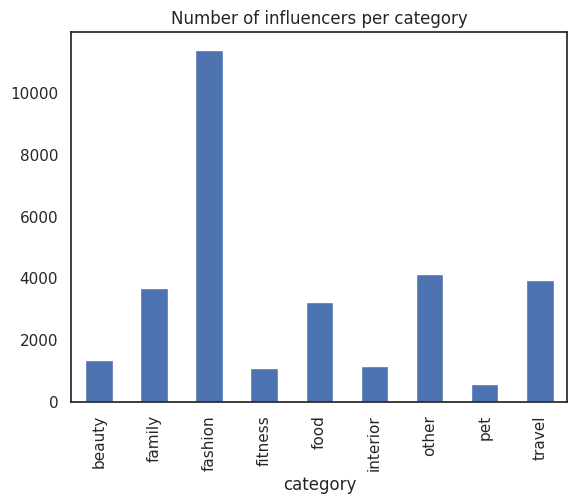

In [5]:
influencers_df.groupby("category").count()["username"].plot.bar(
    title="Number of influencers per category", legend=False
)
plt.show()

### posts per category

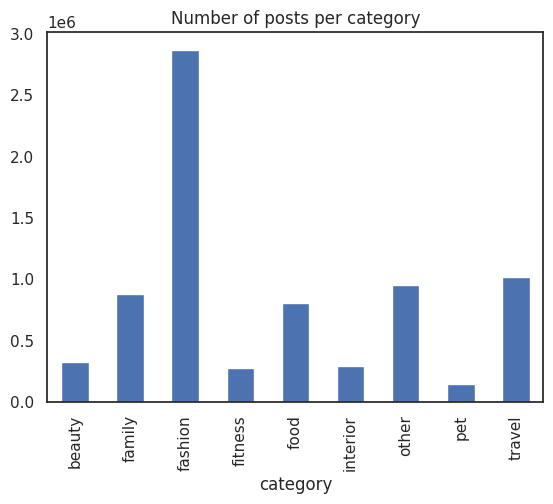

In [6]:
categories_df.groupby("category").count()["username"].plot.bar(
    title="Number of posts per category", legend=False
)
plt.show()

### posts per influencer

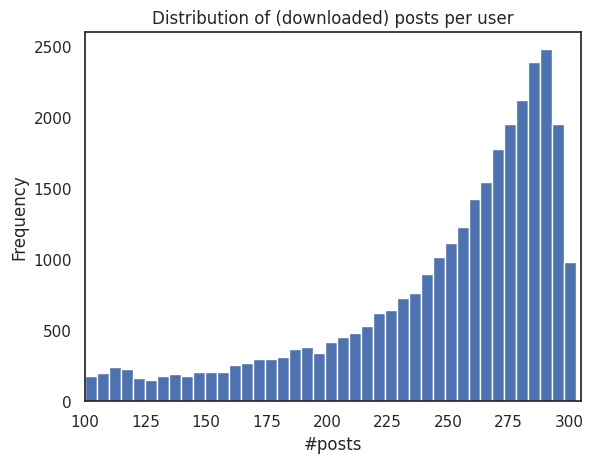

In [7]:
categories_df.groupby("username").count()["shortcode"].plot.hist(
    title="Distribution of (downloaded) posts per user", legend=False, bins=100
)
plt.xlabel("#posts")
plt.xlim([MIN_POSTS, 305])
plt.show()

### influencers descriptors

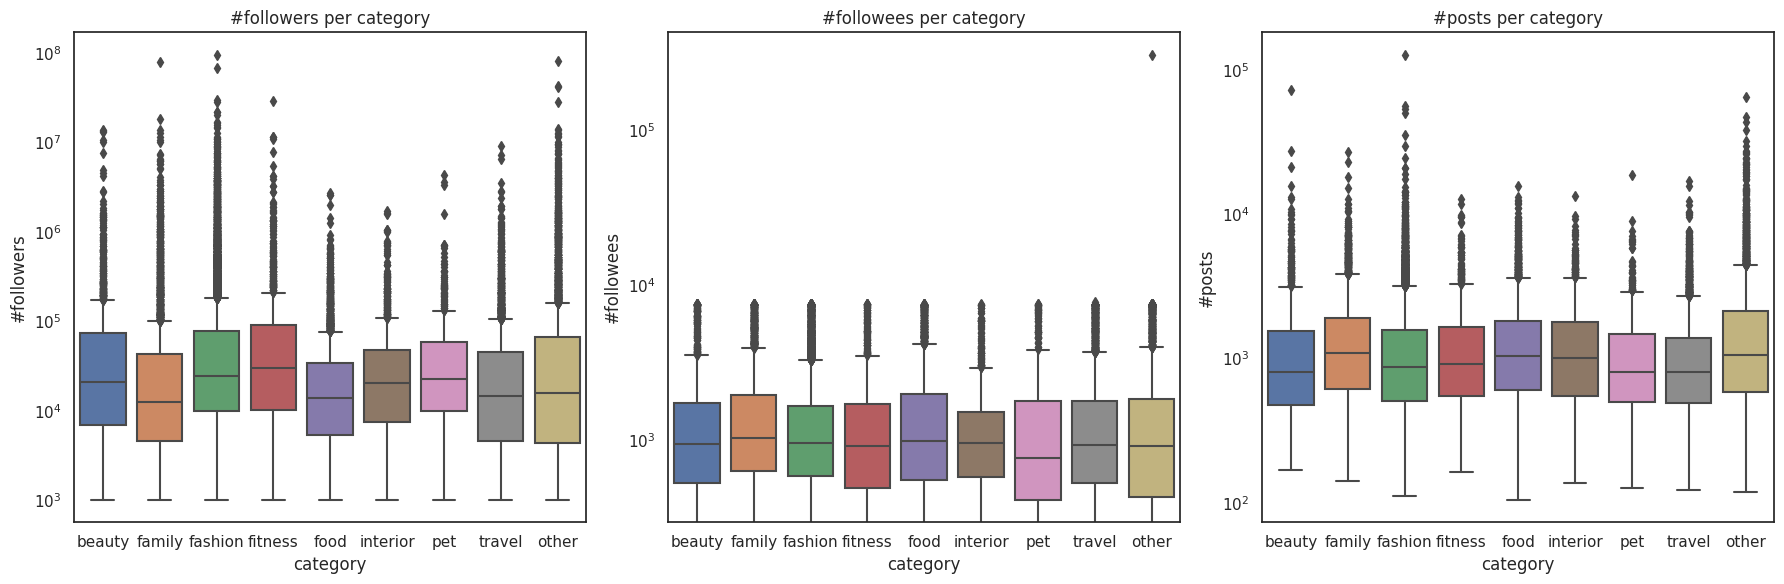

In [8]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))


for ind, col in enumerate(["#followers", "#followees", "#posts"]):
    sns.boxplot(data=influencers_df, x="category", y=col, ax=axes[ind])
    axes[ind].set_title(f"{col} per category")
    axes[ind].set(yscale="log")

plt.tight_layout()
plt.show()

### posts descriptors

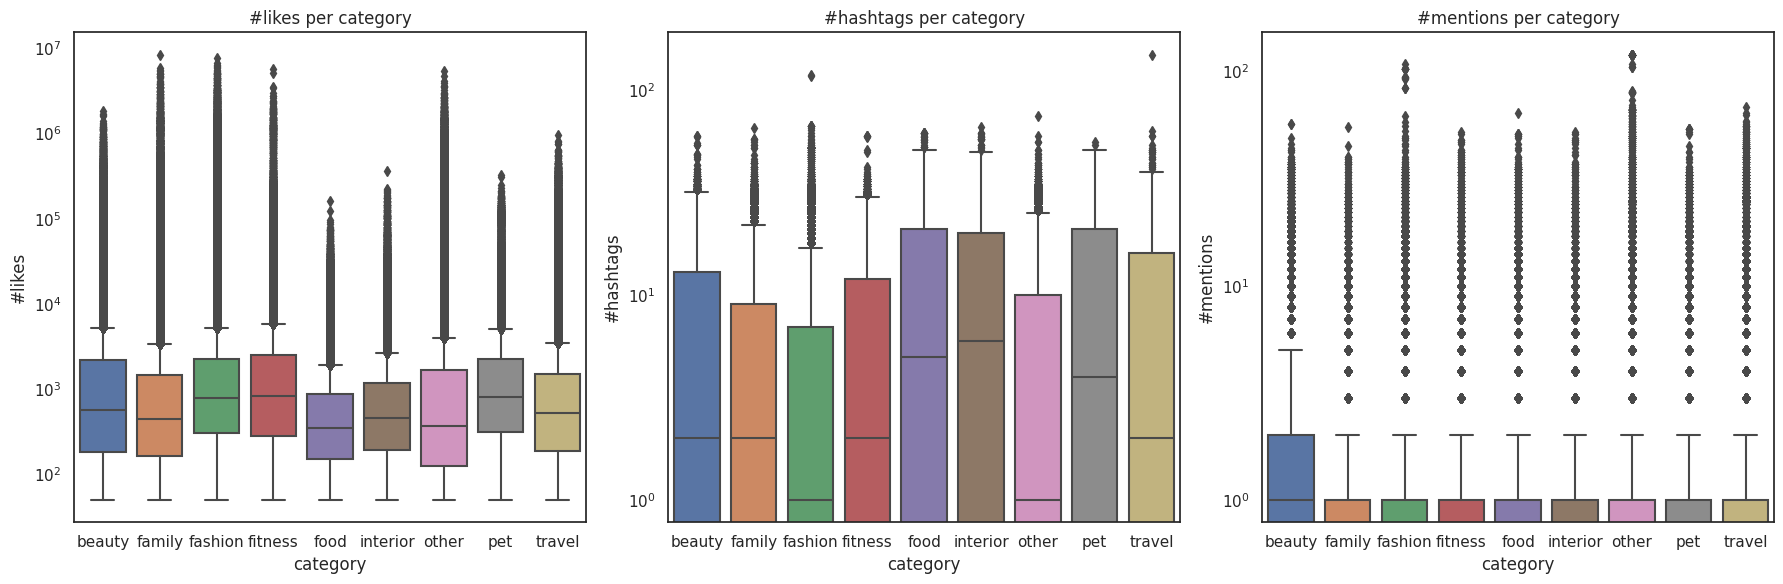

In [9]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))


for ind, col in enumerate(["#likes", "#hashtags", "#mentions"]):
    sns.boxplot(data=categories_df, x="category", y=col, ax=axes[ind])
    axes[ind].set_title(f"{col} per category")
    axes[ind].set(yscale="log")

plt.tight_layout()
plt.show()

### distribution of loglikes

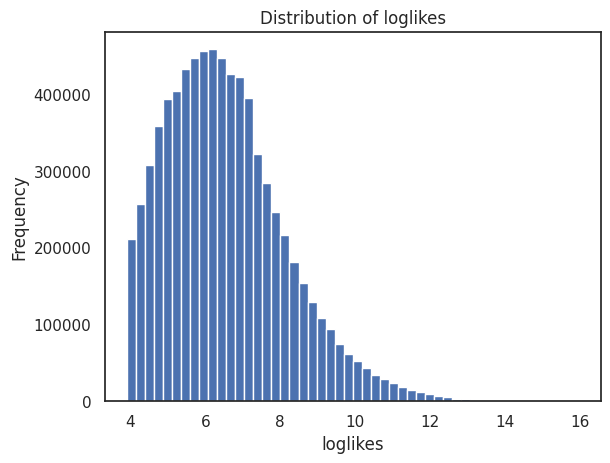

In [10]:
categories_df["#loglikes"].plot.hist(
    title="Distribution of loglikes", legend=False, bins=50
)
plt.xlabel("loglikes")
plt.show()

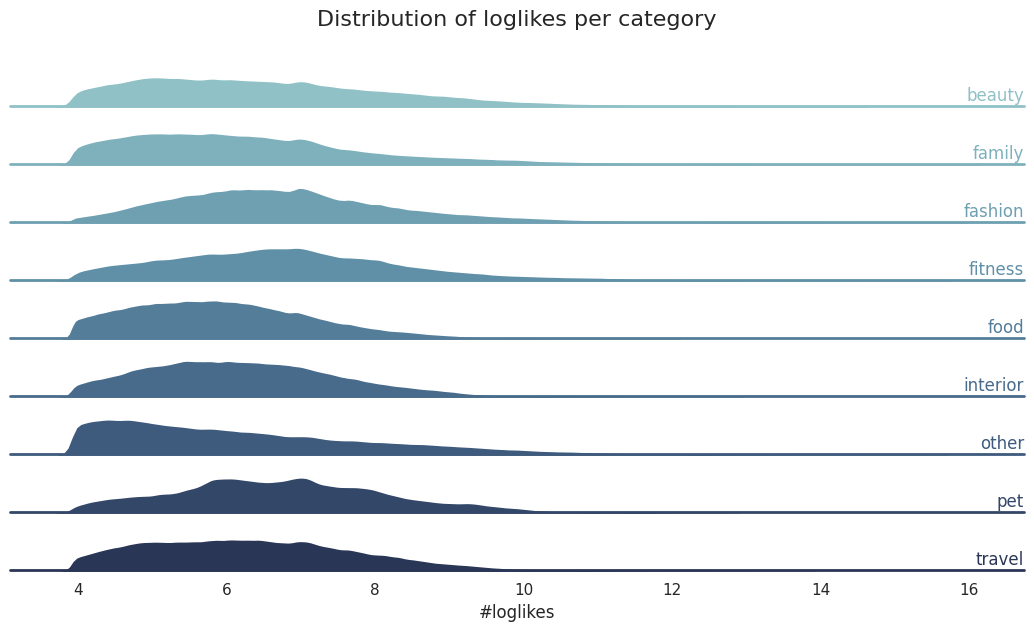

In [11]:
def plot_overlapping_kde(df, col, title):
    pal = sns.cubehelix_palette(10, rot=-0.25, light=0.7)
    g = sns.FacetGrid(
        df, row="category", hue="category", aspect=15, height=0.7, palette=pal
    )

    g.map(
        sns.kdeplot,
        col,
        bw_adjust=0.5,
        clip_on=False,
        fill=True,
        alpha=1,
        linewidth=1.5,
    )
    g.map(sns.kdeplot, col, clip_on=False, color="w", lw=2, bw_adjust=0.5)

    g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)

    def label(x, color, label):
        ax = plt.gca()
        ax.text(
            1, 0.25, label, color=color, ha="right", va="center", transform=ax.transAxes
        )

    g.map(label, col)

    g.figure.subplots_adjust(hspace=-0.25)

    g.set_titles("")
    g.set(yticks=[], ylabel="")
    g.despine(bottom=True, left=True)

    g.fig.suptitle(title, fontsize=16, y=1.0)
    g.fig.tight_layout()
    plt.show()


plot_overlapping_kde(
    categories_df, "#loglikes", "Distribution of loglikes per category"
)